In [73]:
# import modules
import pandas as pd
import numpy as np
import quandl 
import matplotlib.pyplot as plt

In [92]:
# prepare data LOADING ORIGINAL DATA
# sample data AMAZON
# Time span 2015-01-01 to 2017-12-31 with daily frequency
amzn = quandl.get('WIKI/AMZN', start_date = '2015-01-01', end_date = '2017-12-31')
amzn.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,312.58,314.75,306.9601,308.52,2788101.0,0.0,1.0,312.58,314.75,306.9601,308.52,2788101.0
2015-01-05,307.01,308.38,300.8500,302.19,2774231.0,0.0,1.0,307.01,308.38,300.8500,302.19,2774231.0
2015-01-06,302.24,303.00,292.3800,295.29,3519034.0,0.0,1.0,302.24,303.00,292.3800,295.29,3519034.0
2015-01-07,297.50,301.28,295.3300,298.42,2640349.0,0.0,1.0,297.50,301.28,295.3300,298.42,2640349.0
2015-01-08,300.32,303.14,296.1100,300.46,3088398.0,0.0,1.0,300.32,303.14,296.1100,300.46,3088398.0


In [93]:
amzn = pd.DataFrame(amzn)
amzn = amzn[['Adj. Close','Adj. Volume']].copy()
amzn.head()

,Adj. Close,Adj. Volume
Date,,
2015-01-02,308.52,2788101.0
2015-01-05,302.19,2774231.0
2015-01-06,295.29,3519034.0
2015-01-07,298.42,2640349.0
2015-01-08,300.46,3088398.0


In [94]:
# calculation of returns
amzn['returns'] = np.log(amzn['Adj. Close']/amzn['Adj. Close'].shift(1))
amzn['returns_dis'] = amzn['Adj. Close'].pct_change()
amzn.dropna(inplace = True)

In [95]:
# creating features
# price frequency: 1 day - 7 days
for day in range(1,8,1):
    amzn['Close'+ str(day) + 'd'] = amzn['Adj. Close'].shift(day)
amzn.head(10)

,Adj. Close,Adj. Volume,returns,returns_dis,Close1d,Close2d,Close3d,Close4d,Close5d,Close6d,Close7d
Date,,,,,,,,,,,
2015-01-05,302.19,2774231.0,-0.020731,-0.020517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,295.29,3519034.0,-0.023098,-0.022833,302.19,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,298.42,2640349.0,0.010544,0.010600,295.29,302.19,NaN,NaN,NaN,NaN,NaN
2015-01-08,300.46,3088398.0,0.006813,0.006836,298.42,295.29,302.19,NaN,NaN,NaN,NaN
2015-01-09,296.93,2570947.0,-0.011818,-0.011749,300.46,298.42,295.29,302.19,NaN,NaN,NaN
2015-01-12,291.41,3421392.0,-0.018765,-0.018590,296.93,300.46,298.42,295.29,302.19,NaN,NaN
2015-01-13,294.74,4136442.0,0.011362,0.011427,291.41,296.93,300.46,298.42,295.29,302.19,NaN
2015-01-14,293.27,5538666.0,-0.005000,-0.004987,294.74,291.41,296.93,300.46,298.42,295.29,302.19
2015-01-15,286.95,4419196.0,-0.021786,-0.021550,293.27,294.74,291.41,296.93,300.46,298.42,295.29


In [96]:
# drop NA
amzn_7d = amzn[[x for x in amzn.columns if 'Close' in x]].iloc[7:]
amzn_7d.head()

,Adj. Close,Close1d,Close2d,Close3d,Close4d,Close5d,Close6d,Close7d
Date,,,,,,,,
2015-01-14,293.27,294.74,291.41,296.93,300.46,298.42,295.29,302.19
2015-01-15,286.95,293.27,294.74,291.41,296.93,300.46,298.42,295.29
2015-01-16,290.74,286.95,293.27,294.74,291.41,296.93,300.46,298.42
2015-01-20,289.44,290.74,286.95,293.27,294.74,291.41,296.93,300.46
2015-01-21,297.25,289.44,290.74,286.95,293.27,294.74,291.41,296.93


In [97]:
# standardize features
import sklearn
from sklearn import linear_model
x_train = amzn_7d
x_train = sklearn.preprocessing.scale(x_train)
x_train

array([[-1.91588188, -1.9046135 , -1.91524052, ..., -1.87077511,
        -1.88062549, -1.84541859],
       [-1.94435824, -1.91123921, -1.9002232 , ..., -1.86156015,
        -1.86647899, -1.87662597],
       [-1.92728144, -1.93972522, -1.90685247, ..., -1.87750565,
        -1.85725892, -1.86246958],
       ...,
       [ 2.08968727,  2.07089778,  2.03954712, ...,  2.14477946,
         2.16576929,  2.12085751],
       [ 2.10698937,  2.09568782,  2.07742866, ...,  2.1006922 ,
         2.15130642,  2.17259843],
       [ 2.0320587 ,  2.11299578,  2.10223205, ...,  2.08777318,
         2.10719467,  2.15812545]])

In [98]:
# fit logistic regression model to data
lm = linear_model.LogisticRegression(C = 1000)

In [99]:
# calculate labels for the training set
y_train = np.sign(amzn_7d['Adj. Close'].pct_change().shift(-1)) #take next day's return
y_train.head(10)
y_train.replace(to_replace = np.NaN, value =0, inplace = True)
y_train = y_train.values.reshape(-1,1)
y_train[-10:] # the last day's prediction should be Na and is replaced by 0

array([[ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.]])

In [100]:
lm.fit(x_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
# accuracy
lm.score(x_train, y_train)

0.5597315436241611

In [103]:
amzn['predictions'] = np.NaN
amzn['predictions'].ix[7:] = lm.predict(x_train)

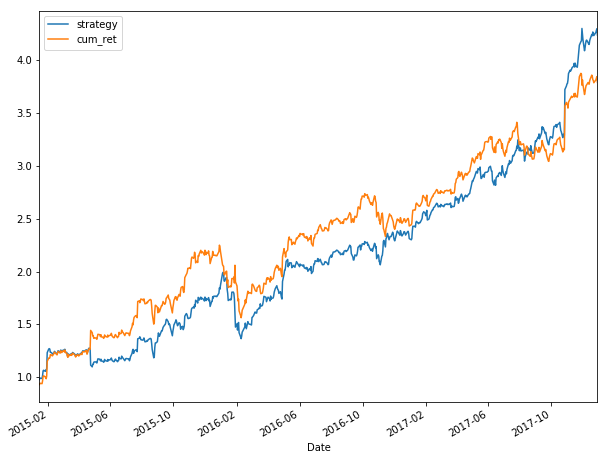

In [104]:
amzn['strategy'] = (amzn['predictions'].shift(1)*amzn['returns']).cumsum().apply(np.exp)
amzn['cum_ret'] = amzn['returns'].cumsum().apply(np.exp)
amzn[['strategy','cum_ret']].dropna().plot(figsize = (10,8))

In [105]:
# Testing 
amzn_test = quandl.get('WIKI/AMZN',start_date = '2017-01-01', end_date = '2018-07-31')
amzn_test = pd.DataFrame(amzn)
amzn_test = amzn_test[['Adj. Close']].copy()
amzn_test.head()

,Adj. Close
Date,
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46
2015-01-09,296.93


In [106]:
amzn_test['returns'] = np.log(amzn['Adj. Close']/amzn['Adj. Close'].shift(1))
amzn_test.dropna(inplace = True)